In [ ]:
!pip install -r requirements.txt

In [ ]:
import numpy as np
import pandas as pd 

# The Goal

In this project, I'd like to answer some questions based on hypothesis tests. For answering each question, we should consider some points that make tha question different.

<hr>

# What is data?

For doing this, I have two different datasets that contain data from FIFA competitions for women and men. In this dataset, we have these variables:
* **date**: ranging from 1800s to 2022
* **home_team**: the name of team that was host of the match
* **away_team**: the name of team that was guest of the match
* **home_score**: the number of goals that the host team could score.
* **away_score**: the number of goals that the guest team could score.
* **tournament**: the name of the tournament or competitions.

Overall, we have 4884 records for women and 44,352 records for men.

In [3]:
men_df = pd.read_csv('men_results.csv')
women_df = pd.read_csv('women_results.csv')

Now, I drop the variables that I don't need and also create <b>"Goal"</b> variable for both women and men.

In [4]:
#creat new column
men_df['goal'] = men_df['home_score'] + men_df['away_score']
women_df['goal'] = women_df['home_score'] + women_df['away_score']

#remove un-needed columns
men_df = men_df.drop(['Unnamed: 0', 'date', 'home_team' , 'away_team', 'home_score', 'away_score'], axis = 1)
women_df = women_df.drop(['Unnamed: 0', 'date', 'home_team' , 'away_team', 'home_score', 'away_score'], axis = 1)

<hr>

# Test Assumptions

For all above test, we must meet these two assumptions:
* If I'm using one group (or two groups), that data must obey normal distribution. If the data is not normal, I use a nonparametric test, such as the <i>Mann-Whitney U test</i> or <i>WilCoxin</i>. To check the normality assumtpion, I use plots and statistical test.

* If I'm using one two groups, their variance must be the same. Otherwise, I use <i>Welch's t-test</i>. To check the variance equality, I <i>Levene's test</i>.

> ## Check Normality

#### **Shapiro-Wilk**

* $Null$ : The the women's goals and men's come from normal distribution.
* $Alt$ : The the women's goals and men's <u>do not</u> come from normal distribution.

In [5]:
from scipy.stats import shapiro

# declare variables
m_goal = men_df['goal']
w_goal = women_df['goal']

# Conduct the Shapiro-Wilk test for normality for each dataset
m_SW, m_SW_pvalue = shapiro(m_goal)
w_SW, w_SW_pvalue = shapiro(w_goal)

# Print the results of the Shapiro-Wilk test
print('Shapiro-Wilk test statistic for men:', m_SW)
print('p-value for men:', round(m_SW_pvalue, 4))
print()
print('Shapiro-Wilk test statistic for women:', w_SW)
print('p-value for women:', round(w_SW_pvalue , 4))

Shapiro-Wilk test statistic for men: 0.8973918557167053
p-value for men: 0.0

Shapiro-Wilk test statistic for women: 0.8615658283233643
p-value for women: 0.0


C:\Users\saigo\AppData\Roaming\Python\Python312\site-packages\scipy\stats\_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


#### **Q-Q Plot**

A Q-Q plot, or quantile-quantile plot, is a graphical method for assessing whether a set of data comes from a particular distribution, such as a normal distribution. If the data are normally distributed, the points on the Q-Q plot should fall along a straight line.

* If the points on the Q-Q plot curve upward or downward, it suggests that the data have heavier or lighter tails.
* If the points form an S-shaped curve, it suggests that the data have both heavier tails and more extreme values than a normal distribution.

It's important to note that the Q-Q plot is a visual tool and can be subjective.

In [6]:
import statsmodels.api as sm

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure
%matplotlib inline

def QQ_plot(df , var):
    sm.qqplot(df[var], line='s')
    plt.xlabel('Theoretical quantiles')
    plt.ylabel('Sample quantiles')
    plt.show()

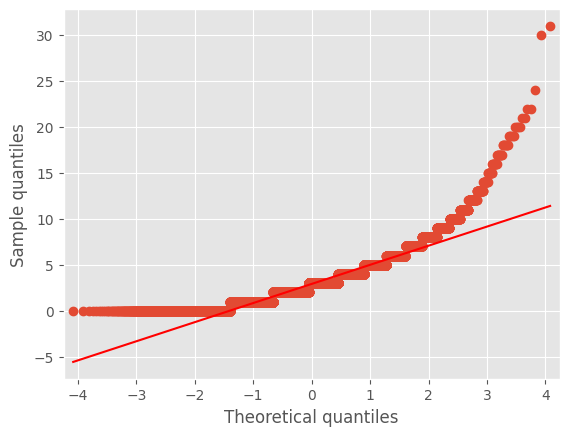

In [7]:
#men
QQ_plot(men_df , 'goal')

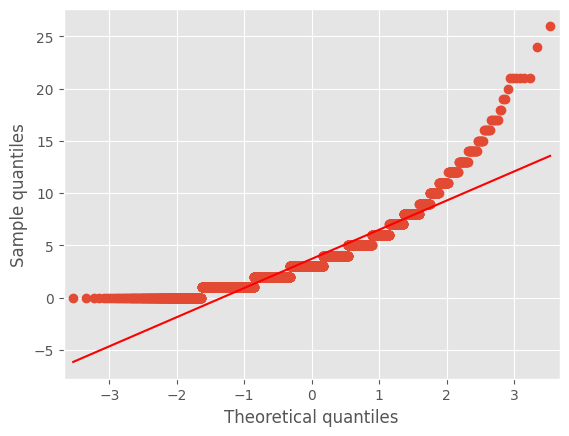

In [8]:
#women
QQ_plot(women_df , 'goal')

#### **Histgoram Distribution**

We also can draw the histogram to see the skenwss and differenece between mean and median.

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Function to draw a KDE plot with mean and median lines
def kde_plot(df, var):
    # Set the figure size
    plt.figure(figsize=(8, 3))
    
    # Plot the KDE with specified line width and histogram transparency
    sns.distplot(df[var], kde_kws={"lw": 2}, hist_kws={'alpha': 0.25})
    
    # Remove the left spine for better aesthetics
    sns.despine(left=True)
    
    # Calculate mean and median
    mean = df[var].mean()
    median = df[var].median()
    
    # Draw vertical lines for mean and median
    plt.axvline(mean, color='black', linestyle='dashed', label='Mean')
    plt.axvline(median, color='green', linestyle='solid', label='Median')
    
    # Set x and y-axis labels to empty strings for cleaner plot
    plt.xlabel('')
    plt.ylabel('')
    
    # Show legend for mean and median lines
    plt.legend()
    
    # Display the plot
    plt.show()

C:\Users\saigo\AppData\Local\Temp\ipykernel_26472\2328854805.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[var], kde_kws={"lw": 2}, hist_kws={'alpha': 0.25})


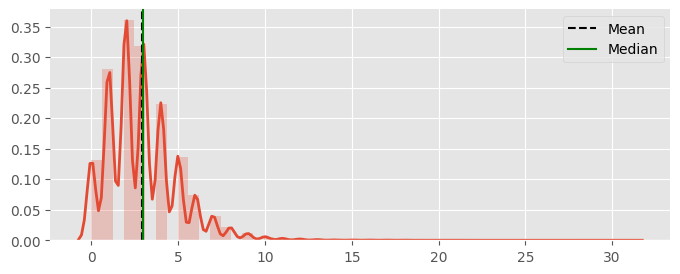

In [14]:
#men
kde_plot(men_df, 'goal')

C:\Users\saigo\AppData\Local\Temp\ipykernel_26472\2328854805.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[var], kde_kws={"lw": 2}, hist_kws={'alpha': 0.25})


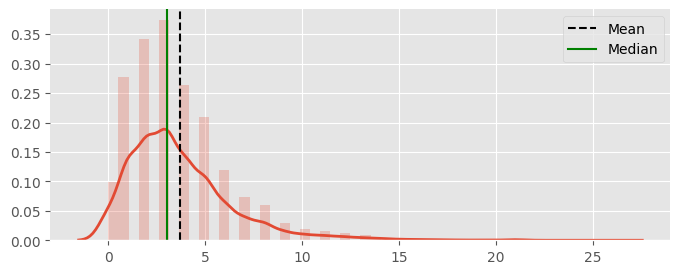

In [15]:
#women
kde_plot(women_df, 'goal')

> ## Check Variance Equality

I should compare the variances of the two datasets. For doing this, I use the <i>Levene's test</i>. If the variances are not equal, I need to use a modified t-test, such as the <i>Welch's t-test</i>, which does not assume equal variances.

* $Null$ : The variances of the women's goals and men's are <u>not</u> significantly different.
* $Alt$ : The variances of the women's goals and men's are significantly different.

In [16]:
from scipy.stats import levene

# declare variable
m_goal = men_df['goal']
w_goal = women_df['goal']

# Conduct the Levene's test to compare the variances of the two datasets
statistic, pvalue = levene(m_goal, w_goal)

print('Levene test statistic:', statistic)
print('p-value:', pvalue)

Levene test statistic: 309.72582760733775
p-value: 4.0829508280646485e-69


<hr>

# Test (1)

In this test, we want to analyse these hypothesis:
* $H_0$ : The mean of scored goal of men's matches is equal or less than 2.5
* $H_a$ : The mean of scored goal of men's matches is greater than 2.5

So, we can have the below equations:

* $H_0$  :  $\mu_m \leq$ 2.5
* $H_a$  :  $\mu_m >$ 2.5

For answering this question, we consider this condition:
1. We have one sample
2. We have large dataset
3. We don't know the population variance
4. We must test right-tail

So, with this condition, I use <b><i>Z-Statistic</i></b>

> ## Process

In [17]:
#the null value that question arose
Test1_Null_Value = 2.5

#the sample mean
Test1_Mean = men_df['goal'].mean()
Test1_Mean

2.9193515658467297

In [18]:
#the sample standard deviation 
n_bootstraps = 5000

# Generate n_bootstraps resamples of the data with replacement
Test1_boot = np.zeros(n_bootstraps)
for i in range(n_bootstraps):
    Test1_boot_sample = men_df['goal'].sample(frac = 1, replace = True)
    Test1_boot[i] = Test1_boot_sample.mean()

# Calculate the standard deviation of the means
Test1_Std = Test1_boot.std()

Now, I run z-test:

$ \frac{x - \mu_m} {SE_m} $

In [19]:
#compute z-score
Test1_Z = (Test1_Mean - Test1_Null_Value) / (Test1_Std)
Test1_Z

42.904087611284666

In [20]:
#Convert Z-score to normal standard CDF to find p-value
from scipy.stats import norm

# Right tailed
1 - norm.cdf(Test1_Z, loc = 0, scale = 1)

0.0

We can conclude the following statement:

* $ \alpha $ = 0.05
* $ p $ = 0
* $ p $ < $ \alpha $ , we reject $H_0$ and we can say <i>" The mean of scored goal of men's matches is greater than 2.5"</i>

<hr>

# Test (2)

In this test, we want to analyse these hypothesis:
* $H_0$: The differences between men's goal with women's is greater or equal than 75%.
* $H_a$: The differences between men's goal with women's is less than 75%.

So, we can have the below equations:

* $H_0$  :  $p_m $ - $p_w$ $\geq$ 75%
* $H_a$  :  $p_m $ - $p_w$ $<$ 75%

For answering this question, we consider this condition:
1. We have two sample
2. We have large dataset
3. We don't know the population variance
4. We must test left-tail

So, with this condition, I use <b><i>T-Statistic</i></b>

> ## Process

First, I calculate the proportion of goals of women and men match.

$ \frac{\mu_w} {\mu_w + \mu_m} $

$ \frac{\mu_m} {\mu_w + \mu_m} $

In [21]:
total_goal = women_df['goal'].sum() + men_df['goal'].sum()
p_men = men_df['goal'].sum() / total_goal
p_women = women_df['goal'].sum() / total_goal

print(p_men , p_women)

0.8774098242903512 0.12259017570964878


Now, we compute the standard error for two-sample t test that we don't know the population variance.

$ SE = \sqrt{\frac{p_m * q_m} {n_m} + \frac{p_w * q_w} {n_w}} $

In [22]:
n_women = len(women_df)
n_men = len(men_df)

se = np.sqrt((p_women * (1 - p_women) / n_women) + (p_men * (1 - p_men) / n_men))
se

0.004944536009989716

Then, we can calculate t-score.

$ t.score = \frac{d - null} {SE} $

In [23]:
Test2_Null_Value = 0.75
Differenece = p_men - p_women

t_score = (Differenece - Test2_Null_Value) / se
t_score

0.9747423359775287

In [24]:
#Convert t-score to t-standard CDF to find p-value
from scipy.stats import t

degree = n_women + n_men - 2

#Left tailed
t.cdf(t_score, df = degree)

0.8351535620212998

We can conclude the following statement:

* $ \alpha $ = 0.05
* $ p $ = 0.835
* $ p $ > $ \alpha $ , we fail to reject $H_0$ and we can say <i>" The differences between men's goal with women's is greater or equal than 75%"</i>

<hr>

# Test (3)

In this test, we want to analyse these hypothesis:
* $H_0$: The mean number of goals of men's matches in FIFA World Cup is equal to or greater than other tournament.
* $H_a$: The mean number of goals of men's matches in FIFA World Cup is less than other tournament.

So, we can have the below equations:

* $H_0$  :  $\mu_f $ - $\mu_o$ $\geq$ 0
* $H_a$  :  $\mu_f $ - $\mu_o$ $<$ 0

So, with this condition, I use <b><i>ANOVA - Two groups</i></b>

> ## Process

First we should seperate FIFA matches and other tournament.

In [25]:
#create new column for FIFA match
label_list = []

for i in range(men_df.shape[0]):
    if men_df.loc[i, 'tournament'] == 'FIFA World Cup':
        label_list.append('Yes')
    else:
        label_list.append('No')
        
men_df['FIFA'] = label_list

In [26]:
#create two different dataframe
FIFA_tabel = men_df[men_df['FIFA'] == 'Yes']
Other_tabel = men_df[men_df['FIFA'] == 'No']

In [27]:
#compute the mean
mean_fifa = FIFA_tabel['goal'].mean()
mean_other = Other_tabel['goal'].mean()

print(mean_fifa , mean_other)

2.8215767634854774 2.921523888543179


In [28]:
#create a funcion for finding error standard deviation based on bootstrap
def TOUR_SE(df):
    n_bootstraps = 5000
    boot = np.zeros(n_bootstraps)
    
    for i in range(n_bootstraps):
        boot_sample = df['goal'].sample(frac = 1, replace = True)
        boot[i] = boot_sample.mean()
    
    SE = boot.std()
    
    return SE

In [29]:
#compute standard error
se_fifa = TOUR_SE(FIFA_tabel)
se_other = TOUR_SE(Other_tabel)

print(se_fifa ,se_other)

0.061955684898466735 0.0100581732294217


Now, we can find the t-score.

$ t.score = \frac{d - null} {\sqrt{\frac{S^2} {n_m} + \frac{S^2} {n_w}}} $

In [30]:
numerator = mean_fifa - mean_other
denominator = np.sqrt(se_fifa ** 2 / FIFA_tabel.shape[0] + se_other ** 2 / Other_tabel.shape[0])
t_stat = numerator / denominator
t_stat

-50.07264638585357

In [31]:
#calculate degree of freedom
degree = FIFA_tabel.shape[0] + Other_tabel.shape[0] - 2

In [32]:
#Convert t-score to t-standard CDF to find p-value
from scipy.stats import t

#Left tailed
t.cdf(t_stat, df = degree)

0.0

We can conclude the following statement:

* $ \alpha $ = 0.05
* $ p $ = 0
* $ p $ < $ \alpha $ , we reject $H_0$ and we can say <i>" The mean number of goals of men's matches in FIFA World Cup is less than other tournament"</i>